# Stastical evaluation of Braunschweig's weather

Historical daily station observations (temperature, pressure, precipitation, sunshine duration, etc.) for Germany, Version v23.3 \
more information about the data set [here](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/DESCRIPTION_obsgermany_climate_daily_kl_historical_en.pdf) 

Data source: [Deutscher Wetterdienst](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/) \
Station ID of Braunschweig: 662

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

### Importing data

In [14]:
file_path = '../data/braunschweig_weather.csv'
df = pd.read_csv(file_path, delimiter=';', lineterminator='\n', header=0, quotechar='\"')

### Deleting specific columns

In [15]:
df = df.drop(['STATIONS_ID', 'QN_3', 'QN_4', 'eor'], axis='columns')

### Change format of MESS_DATUM into datetime

In [16]:
date_arr = df['MESS_DATUM']
date_arr = date_arr.astype('string')

datetime_arr = []

for i in date_arr:
    datetime_arr.append(date(int(i[0:4]), int(i[4:6]), int(i[6:8]))) 

df['MESS_DATUM'] = np.array(datetime_arr, dtype='str')

### Maximum/minimum temperature in Braunschweig between 1961 and 2022

In [17]:
max_txk_row = df[df.TXK == df.TXK.max()]
min_tnk_row = df[df.TNK == df.TNK.min()]

print(f"Maximum temperature in Braunschweig was {max_txk_row['TXK'].iloc[0]} °C"
      f" on {max_txk_row['MESS_DATUM'].iloc[0]}")
print(f"Minimum temperature in Braunschweig was {min_tnk_row['TNK'].iloc[0]} °C"
      f" on {min_tnk_row['MESS_DATUM'].iloc[0]}")

Maximum temperature in Braunschweig was 38.3 °C on 2022-07-20
Minimum temperature in Braunschweig was -22.8 °C on 1963-01-31


### Last white Christmas
[Definiton for white Christmas](https://www.youtube.com/watch?v=E8gmARGvPlI): snow depth greater than 1cm on Christmas Eve

In [18]:
snow_df = df[['MESS_DATUM', 'SHK_TAG']]

christmas_df = snow_df[(snow_df.MESS_DATUM.str[5:10] == '12-24')]

white_christmas_df = christmas_df[christmas_df.SHK_TAG > 1]

print(f"There were {len(white_christmas_df)} white Christmases since 1961. "
      f"The last one was in the year {white_christmas_df['MESS_DATUM'].iloc[-1][:4]}.")

There were 10 white Christmases since 1961. The last one was in the year 2010.


### Plot mean, min, max temperature of 8th March over time

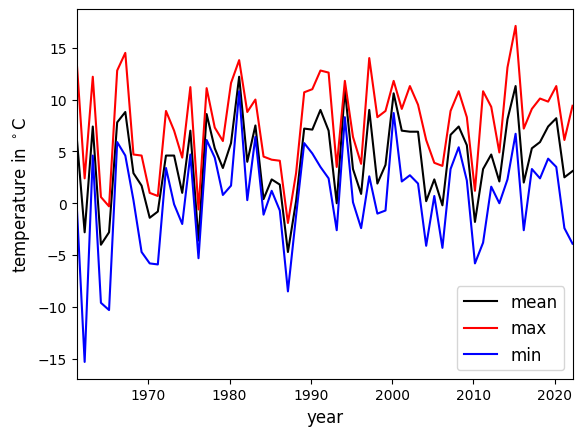

In [19]:
eight_march_df = df[df.MESS_DATUM.str[5:10] == '03-08']
t = np.array(eight_march_df['MESS_DATUM'], dtype='datetime64')

mean_temp = np.array(eight_march_df['TMK'])
min_temp = np.array(eight_march_df['TNK'])
max_temp = np.array(eight_march_df['TXK'])

fig, ax = plt.subplots()

ax.plot(t, mean_temp, color='black', label='mean')
ax.plot(t, max_temp, color='red', label='max')
ax.plot(t, min_temp, color='blue', label='min')

ax.set_xlabel('year', fontsize=12)
ax.set_ylabel(r'temperature in $^\circ$C', fontsize=12)

ax.set_xlim(t[0], t[-1])
ax.legend(fontsize=12)

### Export humidity data into new csv-File

In [20]:
export_df = df[["MESS_DATUM", "UPM"]]

output_file_path = '../data/humidity_data.csv'

export_df.to_csv(output_file_path, sep=';', index=False)